In [1]:
import pandas as pd
from matplotlib import pyplot as pt

In [2]:
df=pd.read_csv("./housing.csv/housing.csv")
df=df[:15]

In [3]:
df['Latitude']

0     37.88
1     37.86
2     37.85
3     37.85
4     37.85
5     37.85
6     37.84
7     37.84
8     37.84
9     37.84
10    37.85
11    37.85
12    37.85
13    37.84
14    37.85
Name: Latitude, dtype: float64

In [4]:
df['Longitude']

0    -122.23
1    -122.22
2    -122.24
3    -122.25
4    -122.25
5    -122.25
6    -122.25
7    -122.25
8    -122.26
9    -122.25
10   -122.26
11   -122.26
12   -122.26
13   -122.26
14   -122.26
Name: Longitude, dtype: float64

Text(0, 0.5, 'Longitude')

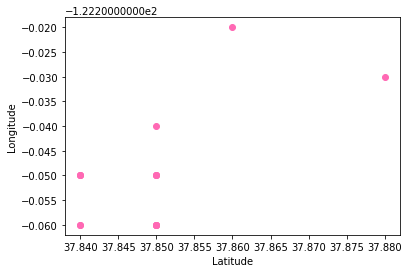

In [8]:
pt.scatter(df['Latitude'],df['Longitude'],color = 'hotpink')
pt.xlabel("Latitude")
pt.ylabel("Longitude")

In [9]:
from sklearn.cluster import KMeans


In [10]:
kmeans=KMeans(n_clusters=3)

In [11]:
kmeans.fit(df[['Latitude','Longitude']])

KMeans(n_clusters=3)

In [12]:
y_predict=kmeans.predict(df[['Latitude','Longitude']])

In [13]:
df['cluster']=y_predict

kmeans.cluster_centers_
centroid_1=kmeans.cluster_centers_
centroid_1

array([[  37.84666667, -122.26      ],
       [  37.87      , -122.225     ],
       [  37.84571429, -122.24857143]])

Text(0, 0.5, 'Longitude')

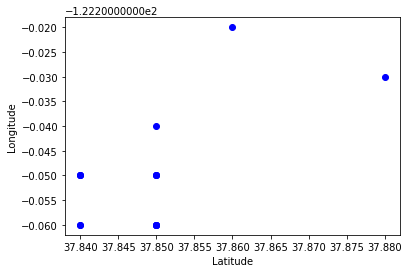

In [15]:
pt.scatter(df['Latitude'],df['Longitude'],color='blue')
pt.xlabel("Latitude")
pt.ylabel("Longitude")

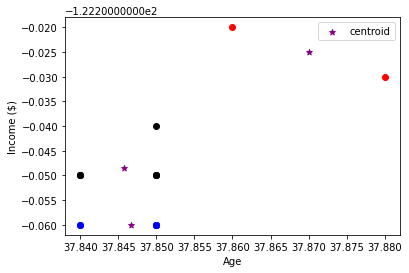

In [16]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]

pt.scatter(df1['Latitude'],df1['Longitude'],color='blue')
pt.scatter(df2['Latitude'],df2['Longitude'],color='red')

pt.scatter(df3['Latitude'],df3['Longitude'],color='black')
pt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
pt.xlabel('Age')
pt.ylabel('Income ($)')
pt.legend()

In [17]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
df1=df.copy()
# df1

In [18]:
scale.fit(df1[['Latitude']])
# df

MinMaxScaler()

In [19]:
df1['Latitude']=scale.transform(df1[["Latitude"]])
# df1

In [20]:
scale.fit(df1[['Longitude']])

MinMaxScaler()

In [21]:
df1['Longitude']=scale.transform(df1[['Longitude']])

kmeans.fit(df[['Latitude','Longitude']])

In [22]:
kmeans.fit(df1[['Latitude','Longitude']])

KMeans(n_clusters=3)

In [23]:
y_predict= kmeans.predict(df1[['Latitude','Longitude']])

df1['cluster']=y_predict
centroid_2=kmeans.cluster_centers_
centroid_1

array([[  37.84666667, -122.26      ],
       [  37.87      , -122.225     ],
       [  37.84571429, -122.24857143]])

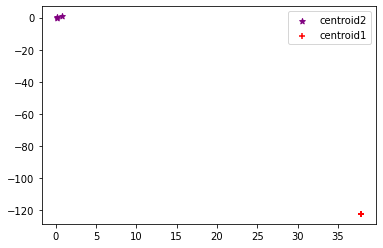

In [29]:
pt.scatter(centroid_2[:,0],centroid_2[:,1],color='purple',marker='*',label='centroid2')
pt.scatter(centroid_1[:,0],centroid_1[:,1],color='red',marker='+',label='centroid1')
pt.legend()

In [27]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df1[['Latitude','Longitude']])
    sse.append(km.inertia_)
df

    

C:\Users\shivam\AppData\Local\Temp/ipykernel_21284/424349021.py:5: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  km.fit(df1[['Latitude','Longitude']])
C:\Users\shivam\AppData\Local\Temp/ipykernel_21284/424349021.py:5: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  km.fit(df1[['Latitude','Longitude']])


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697,2
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992,2
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414,2
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267,0
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611,2


In [28]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697,2
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992,2
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414,2
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267,0
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611,2
